### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [22]:

faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

print(f"Faturamento total da Loja 1: R$ {faturamento_loja1:.2f}")
print(f"Faturamento total da Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Faturamento total da Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Faturamento total da Loja 4: R$ {faturamento_loja4:.2f}")

Faturamento total da Loja 1: R$ 1534509.12
Faturamento total da Loja 2: R$ 1488459.06
Faturamento total da Loja 3: R$ 1464025.03
Faturamento total da Loja 4: R$ 1384497.58


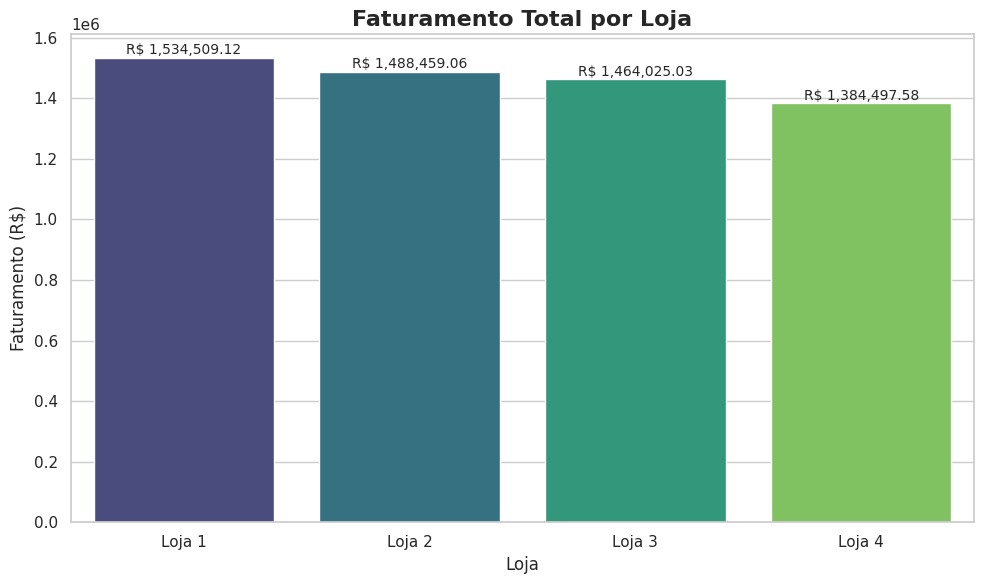

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

df_faturamento = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x="Loja", y="Faturamento", data=df_faturamento, hue="Loja", palette="viridis", dodge=False, legend=False)

plt.title("Faturamento Total por Loja", fontsize=16, fontweight='bold')
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)

for index, row in df_faturamento.iterrows():
    plt.text(index, row["Faturamento"] + 500, f"R$ {row['Faturamento']:,.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [21]:

categorias_loja1 = loja.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja2 = loja2.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja3 = loja3.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja4 = loja4.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")

print("Categorias mais populares - Loja 1:")
print(categorias_loja1.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 2:")
print(categorias_loja2.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 3:")
print(categorias_loja3.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 4:")
print(categorias_loja4.sort_values(by="Quantidade", ascending=False))

Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade
6                 moveis         465
2            eletronicos         448
0             brinquedos         324
1       eletrodomesticos         312
3        esporte e lazer         284
4  instrumentos musicais         182
5                 livros         173
7  utilidades domesticas         171 

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade
6                 moveis         442
2            eletronicos         422
0             brinquedos         313
1       eletrodomesticos         305
3        esporte e lazer         275
4  instrumentos musicais         224
5                 livros         197
7  utilidades domesticas         181 

Categorias mais populares - Loja 3:
    Categoria do Produto  Quantidade
6                 moveis         499
2            eletronicos         451
0             brinquedos         315
1       eletrodomesticos         278
3        esporte e lazer         277


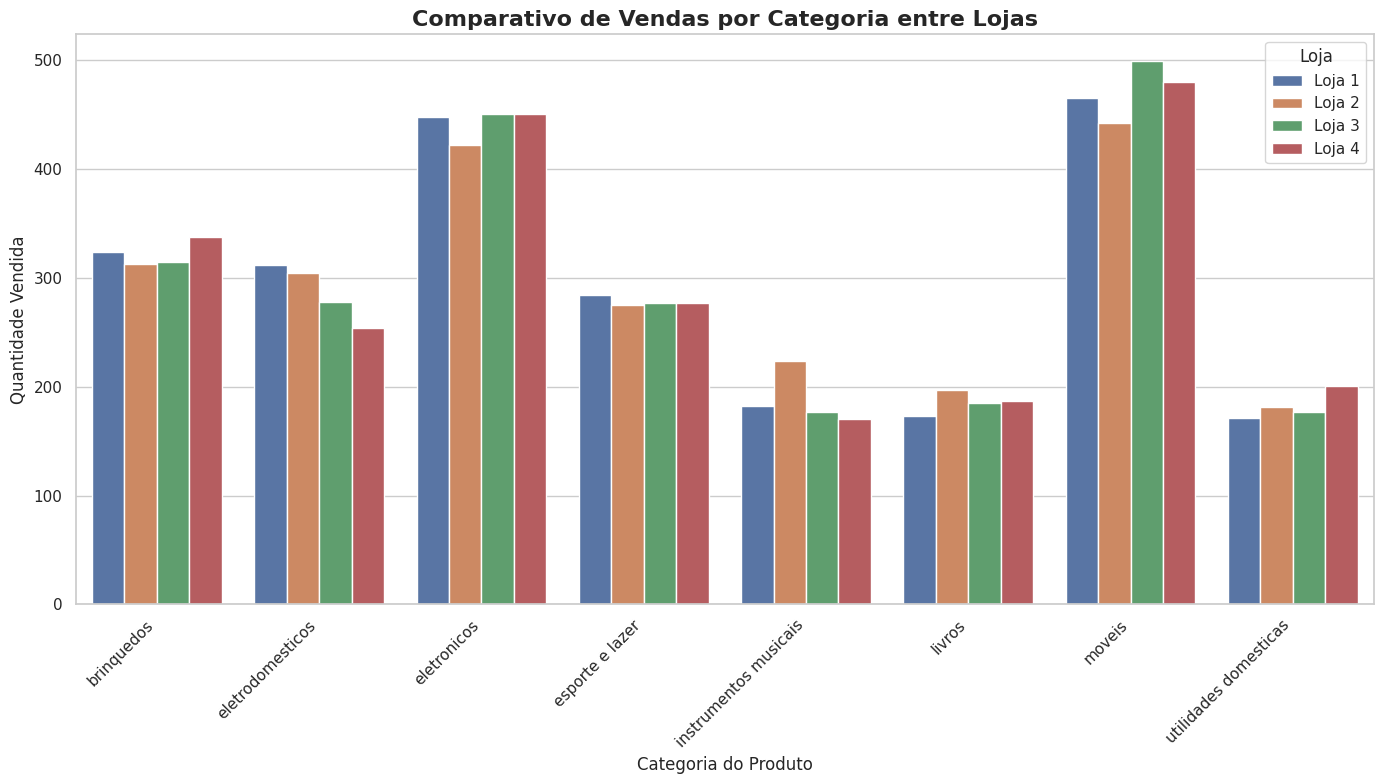

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorias_loja1["Loja"] = "Loja 1"
categorias_loja2["Loja"] = "Loja 2"
categorias_loja3["Loja"] = "Loja 3"
categorias_loja4["Loja"] = "Loja 4"

todas_categorias = pd.concat([categorias_loja1, categorias_loja2, categorias_loja3, categorias_loja4])

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

sns.barplot(data=todas_categorias, x="Categoria do Produto", y="Quantidade", hue="Loja")

plt.title("Comparativo de Vendas por Categoria entre Lojas", fontsize=16, fontweight="bold")
plt.xlabel("Categoria do Produto", fontsize=12)
plt.ylabel("Quantidade Vendida", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Loja")
plt.tight_layout()

plt.show()

# 3. Média de Avaliação das Lojas

In [19]:

media_avaliacoes = {
    "Loja 1": loja["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

df_avaliacoes = pd.DataFrame(list(media_avaliacoes.items()), columns=["Loja", "Média de Avaliação"])
df_avaliacoes["Média de Avaliação"] = df_avaliacoes["Média de Avaliação"].round(2)

print(df_avaliacoes)

     Loja  Média de Avaliação
0  Loja 1                3.98
1  Loja 2                4.04
2  Loja 3                4.05
3  Loja 4                4.00


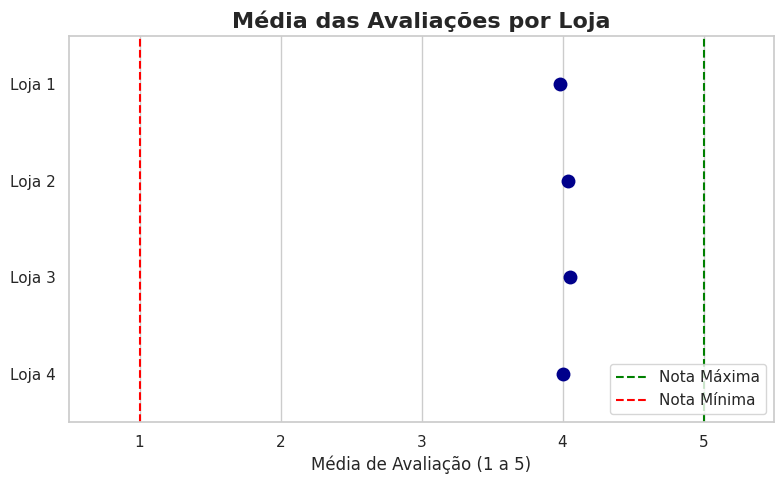

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.stripplot(data=df_avaliacoes, x="Média de Avaliação", y="Loja", size=10, color="darkblue")

plt.axvline(5, color='green', linestyle='--', label='Nota Máxima')
plt.axvline(1, color='red', linestyle='--', label='Nota Mínima')

plt.title("Média das Avaliações por Loja", fontsize=16, fontweight='bold')
plt.xlabel("Média de Avaliação (1 a 5)")
plt.ylabel("")

plt.xlim(0.5, 5.5)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [17]:

produtos_loja1 = loja.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade Vendida", ascending=False)

print("Loja 1 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja1.head(5))
print("Menos vendidos:")
print(produtos_loja1.tail(5), "\n")

print("Loja 2 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja2.head(5))
print("Menos vendidos:")
print(produtos_loja2.tail(5), "\n")

print("Loja 3 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja3.head(5))
print("Menos vendidos:")
print(produtos_loja3.tail(5), "\n")

print("Loja 4 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja4.head(5))
print("Menos vendidos:")
print(produtos_loja4.tail(5))

Loja 1 - Produtos mais e menos vendidos:
Mais vendidos:
               Produto  Quantidade Vendida
43  Secadora de roupas                 214
47       TV Led UHD 4K                 196
17              Cômoda                 188
27          Impressora                 182
2            Bicicleta                 178
Menos vendidos:
           Produto  Quantidade Vendida
15  Corda de pular                 100
48     Tablet ABXY                  99
19  Dinossauro Rex                  94
38         Mochila                  90
11    Celular ABXY                  78 

Loja 2 - Produtos mais e menos vendidos:
Mais vendidos:
                     Produto  Quantidade Vendida
28  Iniciando em programação                 223
12          Celular Plus X42                 195
49                    Violão                 183
37               Micro-ondas                 179
43        Secadora de roupas                 177
Menos vendidos:
              Produto  Quantidade Vendida
42           Poltrona     

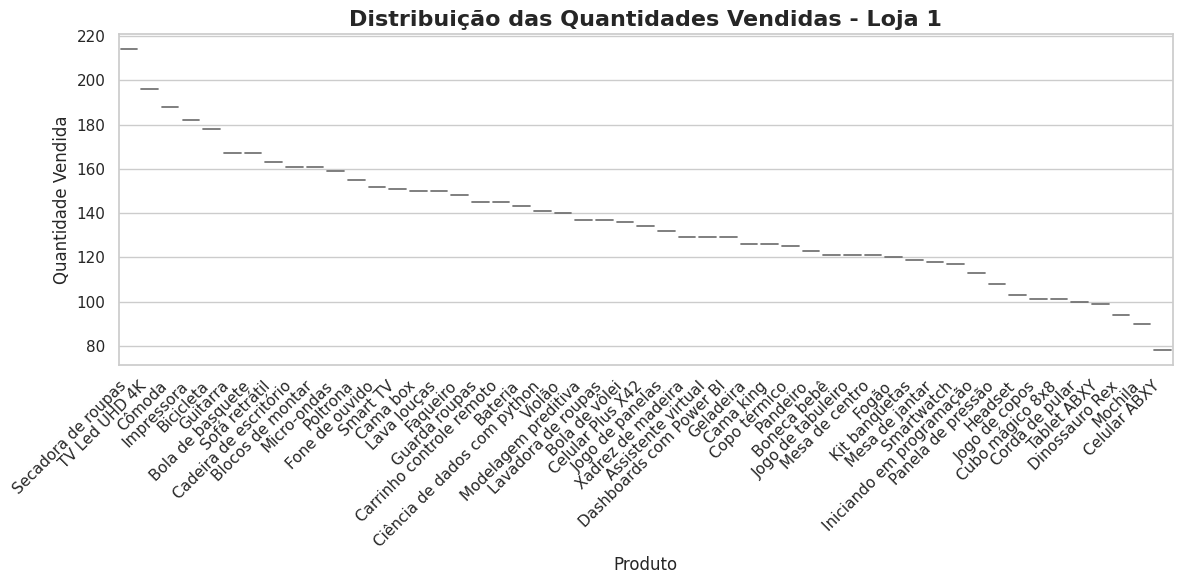

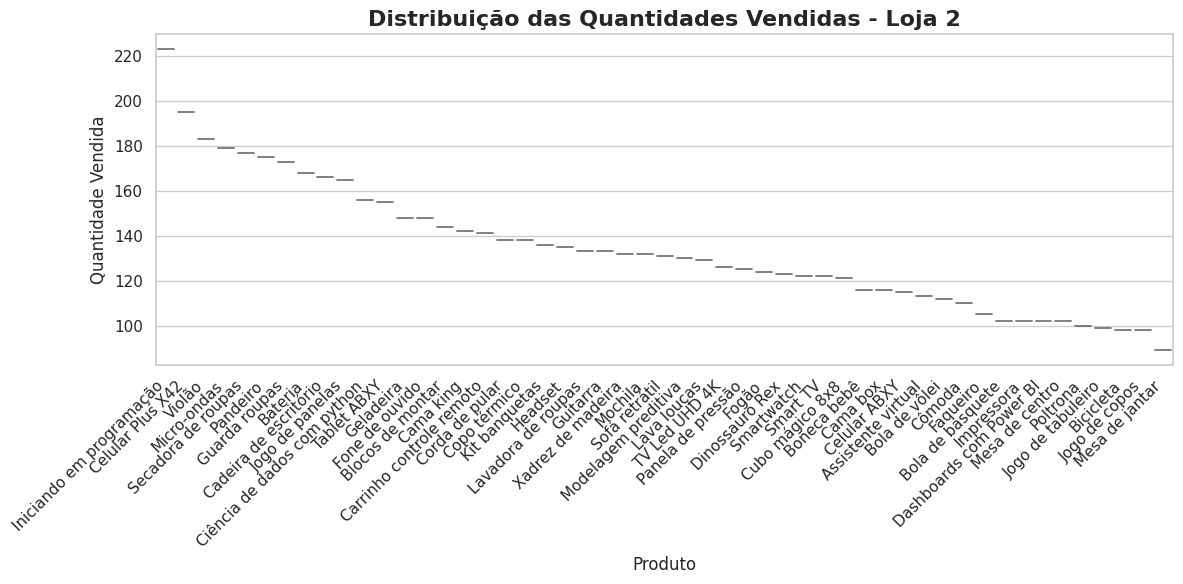

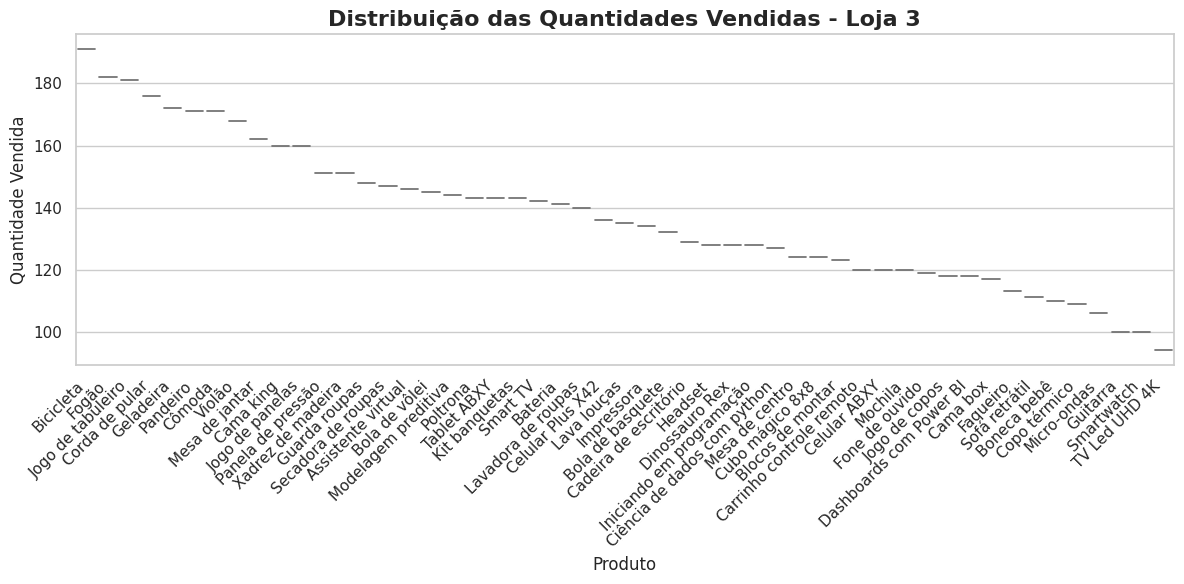

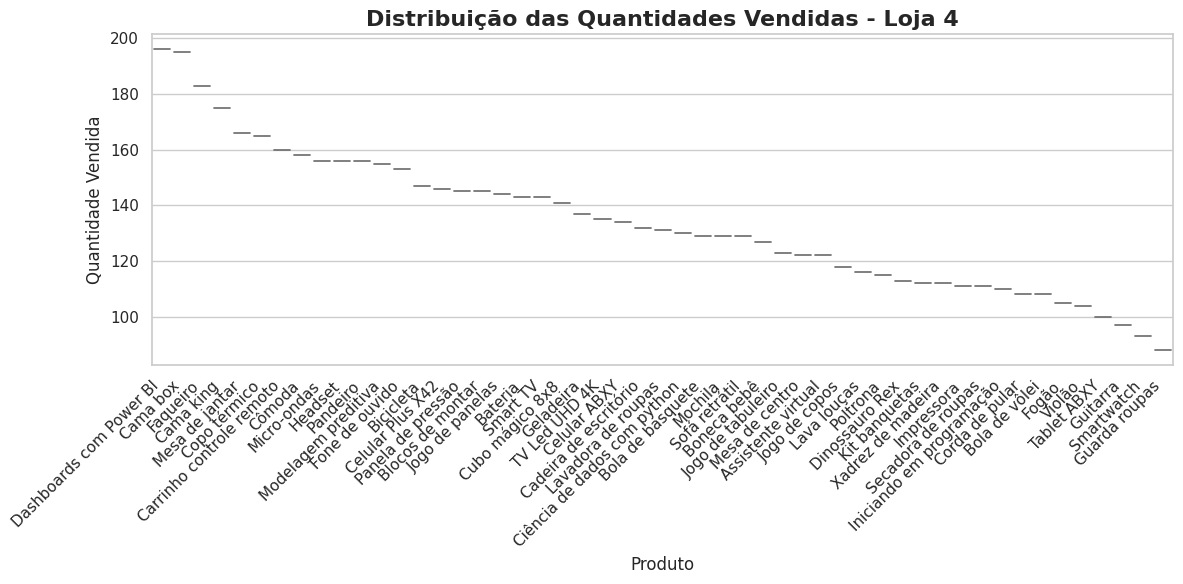

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt

def grafico_violin(loja_data, nome_loja):
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")

    sns.violinplot(x="Produto", y="Quantidade Vendida", data=loja_data, inner="point", color="skyblue")

    plt.title(f"Distribuição das Quantidades Vendidas - {nome_loja}", fontsize=16, fontweight="bold")
    plt.xlabel("Produto", fontsize=12)
    plt.ylabel("Quantidade Vendida", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

grafico_violin(produtos_loja1, "Loja 1")
grafico_violin(produtos_loja2, "Loja 2")
grafico_violin(produtos_loja3, "Loja 3")
grafico_violin(produtos_loja4, "Loja 4")

# 5. Frete Médio por Loja


In [15]:

media_frete = {
    "Loja 1": loja["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

df_frete = pd.DataFrame(list(media_frete.items()), columns=["Loja", "Custo Médio de Frete"])
df_frete["Custo Médio de Frete"] = df_frete["Custo Médio de Frete"].round(2)

print(df_frete)

     Loja  Custo Médio de Frete
0  Loja 1                 34.69
1  Loja 2                 33.62
2  Loja 3                 33.07
3  Loja 4                 31.28


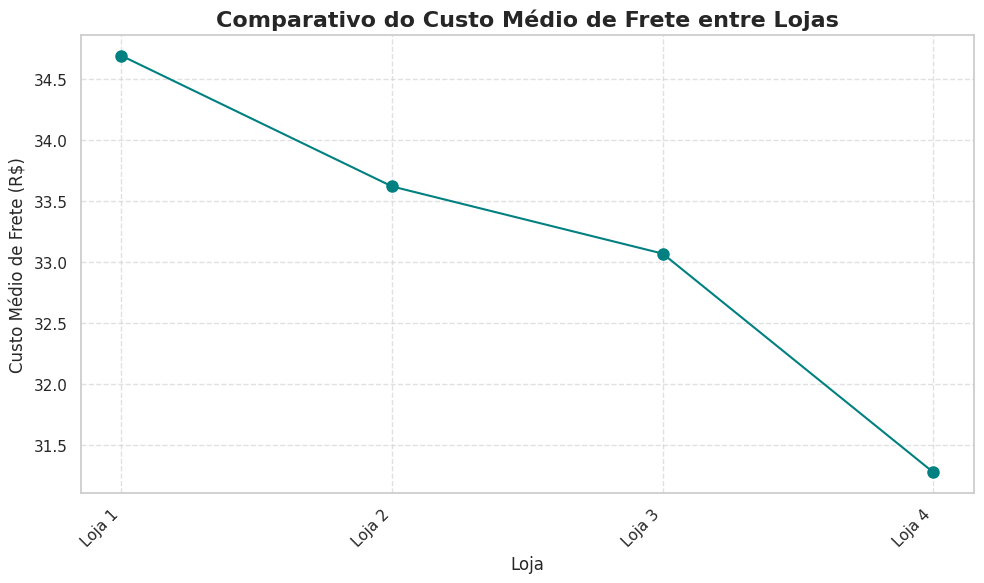

In [14]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_frete["Loja"], df_frete["Custo Médio de Frete"], marker="o", linestyle='-', color="teal", markersize=8)

plt.title("Comparativo do Custo Médio de Frete entre Lojas", fontsize=16, fontweight="bold")
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Custo Médio de Frete (R$)", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()

## Relatório Final

# **📊 Análise de Desempenho das Lojas**  
*(Relatório para decisão estratégica sobre vendas de unidades)*  

**🔍 Introdução**  
Este relatório avalia o desempenho de quatro lojas com base em indicadores-chave, com o objetivo de identificar qual unidade apresenta os piores resultados e deve ser considerada para venda.  

**📌 Critérios de Análise:**  
✔ **Faturamento total**  
✔ **Vendas por categoria de produtos**  
✔ **Satisfação do cliente (média de avaliações)**  
✔ **Performance de produtos (mais e menos vendidos)**  
✔ **Custo médio de frete**  

---

## **📈 Análise Detalhada**  

### **1. 💰 Faturamento Total**  
📉 **Loja 4** registrou o **menor faturamento**, indicando baixa geração de receita em comparação às demais.  

### **2. 🛒 Categorias de Produtos**  
📊 **Loja 3** apresentou a **maior disparidade** entre categorias mais e menos vendidas, sugerindo:  
- **Mix de produtos desequilibrado**  
- **Baixa atração em múltiplos segmentos**  

### **3. ⭐ Avaliação dos Clientes**  
👎 **Loja 1** teve as **piores avaliações**, possivelmente devido a:  
- Insatisfação com produtos ou atendimento  
- Experiência do cliente abaixo do esperado  

### **4. 📦 Produtos Mais e Menos Vendidos**  
🔻 **Loja 3** demonstrou:  
- **Baixo volume de vendas** em vários itens  
- **Pouca diferença** entre produtos mais e menos vendidos  
- **Falta de destaque** em itens estratégicos  

### **5. 🚚 Custo de Frete**  
💸 **Loja 1** tem o **frete mais caro**, o que pode desestimular compras.  

---

## **🎯 Conclusão e Recomendação**  

✅ **Loja 1** tem desafios (avaliações e frete), mas seu **alto faturamento** justifica sua permanência.  

❌ **Loja 3** apresenta:  
- **2º pior faturamento**  
- **Mix de produtos pouco atrativo**  
- **Baixo desempenho por categoria**  

### **🚀 Recomendação Final: Vender a Loja 3**  
A **Loja 3** é a **menos estratégica** do portfólio, com baixa eficiência operacional e comercial. Sua venda permitirá:  
✔ **Foco em lojas mais rentáveis**  
✔ **Recursos para investir em crescimento**  
✔ **Otimização do portfólio de negócios**  

🚀🚀🚀